In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('train.csv')

In [3]:
#train.head()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [5]:
#train.shape

In [6]:
#len(train['사고유형'])

In [7]:
#train.describe()

In [8]:
#sample = train.drop(columns = ['ID','사고일시','시군구','사고유형','사고유형 - 세부분류'])

In [9]:
#sample[sample.사망자수 == 1]

In [10]:
#sns.heatmap(sample.corr())

In [11]:
train['법규위반'].value_counts()

안전운전불이행      21876
안전거리미확보       5277
신호위반          3786
교차로운행방법위반     2750
기타            1396
보행자보호의무위반     1154
직진우회전진행방해      980
차로위반           949
중앙선침범          881
불법유턴           427
과속             133
Name: 법규위반, dtype: int64

In [12]:
# for i in range(23):
#     col = train.iloc[:,i].value_counts()
#     print(col)

In [13]:
#sns.barplot(data = train, x='ECLO', y = '기상상태', orient = 'h')

In [14]:
#sns.barplot(data = train, x='ECLO', y = '도로형태', orient = 'h')

In [15]:
#sns.barplot(data = train, x='ECLO', y = '노면상태', orient = 'h')

In [16]:
#sns.barplot(data = train, x='ECLO', y = '사고유형', orient = 'h')

In [17]:
#sns.barplot(data = train, x='ECLO', y = '사고유형 - 세부분류', orient = 'h')

In [18]:
#sns.barplot(data = train, x='ECLO', y = '법규위반', orient = 'h')

In [19]:
#sns.barplot(data = train, x='ECLO', y = '가해운전자 차종', orient = 'h')

In [20]:
#sns.barplot(data = train, x='ECLO', y = '가해운전자 성별', orient = 'h')

In [21]:
# plt.figure(figsize=(10,10))
# sns.scatterplot(x="ECLO",y="가해운전자 연령",data=train, hue="가해운전자 연령")

In [22]:
# for i in range(39609):
#     condition = train['가해운전자 연령'] == 'NaN'
#     train.loc[condition, '가해운전자 연령'] = 0

In [23]:
# for k in range(10):
#     for i in range(39609):
#         condition = train['가해운전자 연령'] > k*10 and train['가해운전자 연령'] <= (k+1)*10
#         train.loc[condition, '가해운전자 연령'] = k

In [24]:
dtrain = train.dropna()

In [25]:
dtrain.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [26]:
dtrain.head(10)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
5,ACCIDENT_00005,2019-01-01 04,화요일,맑음,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,남,35세,경상,0,0,2,0,6
6,ACCIDENT_00006,2019-01-01 05,화요일,맑음,대구광역시 수성구 지산동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,경상,승용,남,76세,경상,0,0,6,0,18
7,ACCIDENT_00007,2019-01-01 06,화요일,흐림,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,53세,경상,0,0,1,0,3
8,ACCIDENT_00008,2019-01-01 06,화요일,맑음,대구광역시 북구 태전동,기타 - 기타,건조,차대차,기타,안전운전불이행,...,상해없음,자전거,남,62세,중상,0,1,0,0,5
9,ACCIDENT_00009,2019-01-01 10,화요일,맑음,대구광역시 동구 지묘동,단일로 - 터널,건조,차대차,기타,신호위반,...,상해없음,승용,여,42세,경상,0,0,3,0,9


In [27]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38618 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           38618 non-null  object
 1   사고일시         38618 non-null  object
 2   요일           38618 non-null  object
 3   기상상태         38618 non-null  object
 4   시군구          38618 non-null  object
 5   도로형태         38618 non-null  object
 6   노면상태         38618 non-null  object
 7   사고유형         38618 non-null  object
 8   사고유형 - 세부분류  38618 non-null  object
 9   법규위반         38618 non-null  object
 10  가해운전자 차종     38618 non-null  object
 11  가해운전자 성별     38618 non-null  object
 12  가해운전자 연령     38618 non-null  object
 13  가해운전자 상해정도   38618 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         38618 non-null  int64 
 19  중상자수         38618 non-nu

In [28]:
dtrain.기상상태.unique()

array(['맑음', '흐림', '기타', '비', '안개', '눈'], dtype=object)

In [29]:
dtrain.도로형태.unique()

array(['단일로 - 기타', '교차로 - 교차로안', '기타 - 기타', '단일로 - 터널', '단일로 - 지하차도(도로)내',
       '교차로 - 교차로횡단보도내', '주차장 - 주차장', '교차로 - 교차로부근', '단일로 - 고가도로위',
       '단일로 - 교량', '미분류 - 미분류'], dtype=object)

In [30]:
dtrain.노면상태.unique()

array(['건조', '젖음/습기', '기타', '서리/결빙', '적설', '침수'], dtype=object)

In [31]:
dtrain.사고유형.unique()

array(['차대사람', '차대차'], dtype=object)

In [32]:
dtrain['사고유형 - 세부분류'].unique()

array(['길가장자리구역통행중', '보도통행중', '차도통행중', '추돌', '측면충돌', '기타', '횡단중', '정면충돌',
       '후진중충돌'], dtype=object)

In [33]:
weather_map = {
    '기타': 0,
    '맑음' : 1,
    '흐림' : 2,
    '비' : 3,
    '안개' : 4,
    '눈' : 5
}

In [34]:
week_map = {
    '월요일': 0,
    '화요일' : 0,
    '수요일' : 0,
    '목요일' : 0,
    '금요일' : 0,
    '토요일' : 1,
    '일요일' : 1
}

In [35]:
road_map = {
    '단일로 - 기타': 0,
    '교차로 - 교차로안' : 1,
    '기타 - 기타' : 2,
    '단일로 - 터널' : 3,
    '단일로 - 지하차도(도로)내' : 4,
    '교차로 - 교차로횡단보도내' : 5, 
    '주차장 - 주차장' : 6, 
    '교차로 - 교차로부근' : 7,
    '단일로 - 고가도로위' : 8,
    '단일로 - 교량' : 9, 
    '미분류 - 미분류' : 10
}

In [36]:
nom_map = {
    '건조' : 0, 
    '젖음/습기' : 1, 
    '기타' : 2, 
    '서리/결빙' : 3, 
    '적설' : 4, 
    '침수' : 5
}

In [37]:
actype_map = {
    '차대사람' : 0, 
    '차대차' : 1
}

In [38]:
dtrain.loc[:,'기상상태'] = dtrain['기상상태'].map(weather_map)

C:\Users\com\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [39]:
dtrain.loc[:,'요일'] = dtrain['요일'].map(week_map)

In [40]:
dtrain.loc[:,'도로형태'] = dtrain['도로형태'].map(road_map)

In [41]:
dtrain.loc[:,'노면상태'] = dtrain['노면상태'].map(nom_map)

In [42]:
dtrain.loc[:,'사고유형'] = dtrain['노면상태'].map(actype_map)

In [43]:
dtrain.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,0,1,대구광역시 중구 대신동,0,0,NaN,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,0,2,대구광역시 달서구 감삼동,0,0,NaN,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,0,1,대구광역시 수성구 두산동,0,0,NaN,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,0,1,대구광역시 북구 복현동,0,0,NaN,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,0,1,대구광역시 동구 신암동,0,0,NaN,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [51]:
dtrain['구'] = ' '
for i in range(len(dtrain)):
    dtrain.iloc[i, 23] = dtrain.iloc[i, 4].split()[1]

C:\Users\com\AppData\Local\Temp/ipykernel_21532/892237265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrain['구'] = ' '


<AxesSubplot:>

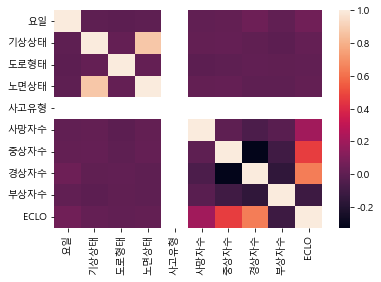

In [45]:
sns.heatmap(dtrain.corr())

In [46]:
# dtrain['분할주소'] = dtrain['시군구'].str.split()

In [47]:
# dtrain['시군'] = dtrain['분할주소'].apply(lambda x: (x[0], x[1]) if len(x) > 0 else None)

In [52]:
dtrain.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,구
0,ACCIDENT_00000,2019-01-01 00,0,1,대구광역시 중구 대신동,0,0,NaN,길가장자리구역통행중,안전운전불이행,...,보행자,여,70세,중상,0,1,0,0,5,중구
1,ACCIDENT_00001,2019-01-01 00,0,2,대구광역시 달서구 감삼동,0,0,NaN,보도통행중,기타,...,보행자,남,61세,경상,0,0,1,0,3,달서구
2,ACCIDENT_00002,2019-01-01 01,0,1,대구광역시 수성구 두산동,0,0,NaN,차도통행중,안전운전불이행,...,보행자,남,38세,경상,0,0,1,0,3,수성구
3,ACCIDENT_00003,2019-01-01 02,0,1,대구광역시 북구 복현동,0,0,NaN,추돌,안전운전불이행,...,승용,남,36세,중상,0,1,0,0,5,북구
4,ACCIDENT_00004,2019-01-01 04,0,1,대구광역시 동구 신암동,0,0,NaN,추돌,안전운전불이행,...,승용,남,52세,경상,0,0,1,0,3,동구
